In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("UpdatedResumeDataSet.csv")


In [6]:
df.sample(10)

,Category,Resume
763,Hadoop,Education Details \r\n\r\nHadoop Developer \r\...
896,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
450,SAP Developer,Competencies: SAP Business Intelligence Versio...
660,Network Security Engineer,Skill Set â¢â¢Cisco Certified Network Associ...
319,Java Developer,Education Details \r\nAugust 2010 to May 2017 ...
142,Web Designing,"Technical Skills Web Technologies: Angular JS,..."
557,Python Developer,Technical Skills / Responsibilities: â¢ Hands...
699,PMO,Skills Exceptional communication and networkin...
261,Sales,SKILLS 1. MS-Office 2. Good Communication skil...
926,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [7]:
df.shape

(962, 2)

In [8]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='Category'>

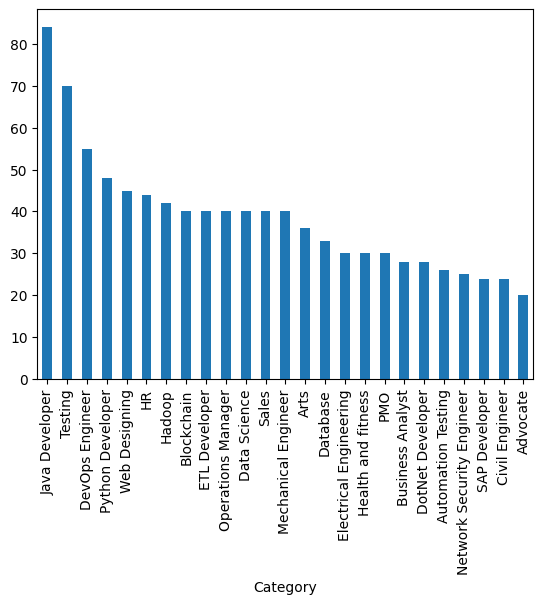

In [9]:
df["Category"].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

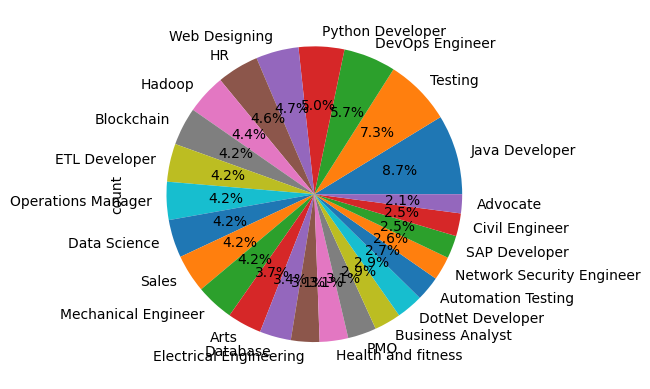

In [10]:
df["Category"].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [12]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


<h2>Data Cleaning</h2>

1. Hashtags
2. html
3. urls
4. mentions
5. special letters
6. punctuations

In [13]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP\AppData\Local\Temp\ipykernel_181616\3739445999.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\HP\AppData\Local\Temp\ipykernel_181616\3739445999.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\HP\AppData\Local\Temp\ipykernel_181616\3739445999.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\HP\AppData\Local\Temp\ipyke

In [14]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

<h2>Encoding Categories</h2>

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
df['Category']=le.fit_transform(df['Category'])

In [17]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [18]:
df_new=pd.read_csv("UpdatedResumeDataSet.csv")

In [19]:
df_new['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

<h2>Vectorization</h2>

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
VectorizedResume=tfidf.transform(df['Resume'])

<h2>Train_test_split</h2>

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(VectorizedResume,df['Category'],test_size=0.2)

In [22]:
X_train.shape

(769, 7351)

<h2>Model Train</h2>

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
classifier=OneVsRestClassifier(KNeighborsClassifier())
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)


In [24]:
y_pred

array([ 7, 13, 24, 10,  7, 24, 10, 16,  1, 14, 11, 13,  6, 13, 23, 10, 23,
        6, 10, 16, 12, 15,  8, 23,  3,  9,  1, 16, 23, 10,  1, 23, 13, 17,
       11, 15, 11, 24, 24, 16, 15, 22,  9,  3,  7, 13,  8,  9, 22, 20,  7,
        4, 24,  3, 21, 19, 10, 14, 11, 15,  7, 14,  2, 13,  0, 15, 15, 17,
       16, 24,  3,  2,  0,  3,  7, 14, 22,  6, 14, 23,  7, 17, 20, 20, 23,
        9,  7, 10,  6,  3, 14,  8, 16, 10, 19, 16, 16, 11,  0, 23, 20,  2,
        8, 13, 16, 23, 19, 20,  6, 22, 13,  8, 15,  3,  9,  7, 11, 14,  7,
       13, 18,  7, 15,  7, 12, 24, 22,  9,  4,  3, 13,  6, 23, 18,  8, 21,
        3,  3, 11, 23, 15,  4, 15,  8,  4, 18, 16, 22, 16, 23,  4, 13, 13,
       15, 15, 17,  7, 24, 14,  8, 13,  8,  3,  5,  6, 20, 12, 15, 18, 22,
        7,  8, 23, 20,  7, 22,  4, 14, 17, 21, 23,  1, 23, 14, 22,  3,  4,
        3,  5, 23, 23, 24, 20])

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

1.0


<h2>Prediction System</h2>

In [26]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(classifier,open('classifier.pkl','wb'))

<h2>Using pickle code instead of all the code</h2>

In [27]:
import pickle
#Loading the trained classifier
classifier=pickle.load(open('classifier.pkl','rb'))

In [28]:
myres="""KARTIK GOYAL 
3482/5,Granthi Bagh, Ropar, Punjab | +91-8146329950 | 
kartikgoyal0904@gmail.com 
Linkedin profile: https://www.linkedin.com/in/kartikgoyal0904 
PROFESSIONAL SUMMARY 
EAspiring data scientist proficient in Python with good statistical analysis and data visualization skills. Enthusiastic learner committed to mastering new tools and methodologies. Ready to collaborate, contribute, and gain practical experience in data cleaning, modeling, and interpretation. 
CORE COMPETENCIES 

Python 
Machine Learning 

Mysql Scikit Learn, Numpy and Pandas Tableau Front-end web development 
PROFESSIONAL EXPERIENCE 
TIE Chandigarh 
Management Intern | 15 March, 2023 - 30 April,2023 
Oversee and maintain different excel files. 
Doing marketing and bringing in sponsers. 
Collaborate with senior management and brainstorming ideas. 
Design Innovation Centre 
Data Analyst | 1 June,2023 - 31 July, 2023 
Learning and implemeting visualisation tools like tableau. 
Doing analysis on a healthcare project. 
EXTRA CURRICULARS 
Logistics head 
UIET, Panjab University | 15 Jan,2023-4 March, 2023 
Coordinate venue setup, manage vendor contracts, oversee transportation, and ensure smooth execution of all logistical aspects for college fest. 
Entrepreneurship Development Cell 
Treasurer | Sep,2023- Present
As Treasurer, managed finances, budgeting, and sponsorships for Entrepreneurship Cell. As a member, contributed ideas and supported various initiatives. 
EDUCATION 
2021- Present | UIET,Panjab University 
Bachelor Of Engineering - Information Technology 
Cgpa-8.48 
 """

In [29]:
cleanred=cleanResume(myres)

In [30]:
type([cleanred])

list

In [31]:
inputt=tfidf.transform([cleanred])

In [32]:
pred=classifier.predict(inputt)

In [33]:
pred[0]

6

In [34]:
category_pair = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

In [35]:
category_pair

{15: 'Java Developer',
 23: 'Testing',
 8: 'DevOps Engineer',
 20: 'Python Developer',
 24: 'Web Designing',
 12: 'HR',
 13: 'Hadoop',
 3: 'Blockchain',
 10: 'ETL Developer',
 18: 'Operations Manager',
 6: 'Data Science',
 22: 'Sales',
 16: 'Mechanical Engineer',
 1: 'Arts',
 7: 'Database',
 11: 'Electrical Engineering',
 14: 'Health and fitness',
 19: 'PMO',
 4: 'Business Analyst',
 9: 'DotNet Developer',
 2: 'Automation Testing',
 17: 'Network Security Engineer',
 21: 'SAP Developer',
 5: 'Civil Engineer',
 0: 'Advocate'}

In [36]:
category_pair.get(pred[0])

'Data Science'

In [37]:
pip install streamlit

   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB 1.9 MB/s eta 0:00:05
    --------------------------------------- 0.2/8.6 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.6 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/8.6 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/8.6 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/8.6 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.6 MB 2.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.6 MB 2.2 MB/s eta 0:00:04
   ---- ----------------------------------- 0.9/8.6 MB 2.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/8.6 MB 2.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.2/8.6 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.6 MB 2.5 MB/s eta 0:00:03
   ------ ---------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 1.9 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/3.0 MB 2.8 MB/s eta 0:00:01
     ----- ---------------------------------- 0.4/3.0 MB 3.0 MB/s eta 0:00:01
     ------ --------------------------------- 0.5/3.0 MB 3.0 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 3.3 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 3.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.9/3.0 MB 3.2 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 3.2 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 3.3 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 3.0 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 3.1 MB/s eta 0:00:01
     ------------------- -------------------- 1.4/3.0 MB 2.9 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import streamlit as slt

In [40]:
import yfinance as yf